# Data Wrangling
Video game reviews along with other pertinent features for the genres of role-playing, shooter and sports games of three gaming consoles (Xbox One, PS4, Nintendo Switch) were scraped from www.metacritic.com. 15 of the most recent user reviews for all games were scraped along with their individual user score and sentiment. However, to truly focus on the actual sentiment of the common user only the average review score and sentiment for all critics were considered.

__Note:__ Not all gamers who submitted a review score left an actual review.

In [1]:
# Import libraries for data cleaning, text-preprocessing and EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Load data
gameReviews = pd.read_csv('MetacriticGameReviews.csv', index_col=0)
gameReviews.head()

,title,platform,metascore,metasentiment,average_userscore,average_usersentiment,developer,genre,number_of_players,esrb_rating,release_date,username,userscore,usersentiment,review,review_date
0,Red Dead Redemption 2,Xbox One,97.0,positive,7.8,positive,Rockstar Games,Action adventure,Up to 32,M,"Oct 26, 2018",gnadenlos,7,mixed,"The main problem is, that it's not a real open...","Nov 1, 2018"
1,Red Dead Redemption 2,Xbox One,97.0,positive,7.8,positive,Rockstar Games,Action adventure,Up to 32,M,"Oct 26, 2018",Feriatus,7,mixed,It's not a bad game but the gameplay is an out...,"Oct 29, 2018"
2,Red Dead Redemption 2,Xbox One,97.0,positive,7.8,positive,Rockstar Games,Action adventure,Up to 32,M,"Oct 26, 2018",ponux,7,mixed,"Visually superb (except cutscenes), good (not ...","Nov 5, 2018"
3,Red Dead Redemption 2,Xbox One,97.0,positive,7.8,positive,Rockstar Games,Action adventure,Up to 32,M,"Oct 26, 2018",Picklock,5,mixed,"Great looking game backed up by clumsy, overly...","Nov 4, 2018"
4,Red Dead Redemption 2,Xbox One,97.0,positive,7.8,positive,Rockstar Games,Action adventure,Up to 32,M,"Oct 26, 2018",Saints,6,mixed,Red Dead Redemption 2 is an amazing game that ...,"Oct 30, 2018"


In [3]:
#gameReviews.review[0]

### Feature definition
***
-  __title:__ Title of the game <br>

2. __platform:__ The console reviewer played the game on <br>

3. __metascore:__ The average score given to the game by various game critics (float range of 1-100) <br>

4. __metasentiment:__ The overall critic sentiment classification based on critic ratings/metascore (positive, mixed, negative) <br>

5. __average_userscore:__ The average score given to the game by users (float range of 1-10) <br>

6. __average_usersentiment:__ The overall user sentiment classification based on average user score (positive, mixed, negative) <br>

7. __developer:__ Developer of game <br>

8. __genre:__ Genre of game <br>

9. __number_of_players:__ Number of players that can play the game <br>

10. __esrb_rating:__ Entertainment Software Rating Board (ESRB) rating <br>

11. __release_date:__ Release date of game <br>

12. __username:__ The Metacritic username of the game reviewer <br>

13. __userscore:__ Individual user rating (integer range of 1-10) <br>

14. __usersentiment:__ Individual user sentiment classification based on their user score (positive, mixed, negative) <br>

15. __review:__ Text review left by user

16. __review_date:__ Date review was left by user

### Initial data exploration

In [4]:
# Save shape of dataframe to compare after data is cleaned
init_shape = gameReviews.shape

# Check dtypes of each feature
gameReviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21075 entries, 0 to 21074
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  21075 non-null  object 
 1   platform               21075 non-null  object 
 2   metascore              21045 non-null  float64
 3   metasentiment          21045 non-null  object 
 4   average_userscore      21045 non-null  float64
 5   average_usersentiment  21045 non-null  object 
 6   developer              21045 non-null  object 
 7   genre                  21060 non-null  object 
 8   number_of_players      17595 non-null  object 
 9   esrb_rating            20565 non-null  object 
 10  release_date           21060 non-null  object 
 11  username               21075 non-null  object 
 12  userscore              21075 non-null  int64  
 13  usersentiment          21075 non-null  object 
 14  review                 21073 non-null  object 
 15  re

Many of the features are of the object type including the release and review date which may be of better us as time series type. There appears to be a significant amount of null values for the "number_of_players" column and a small amount of nulls for a few others.

In [5]:
# Checkout basic statistical qualities for numerical features
gameReviews.describe().T

,count,mean,std,min,25%,50%,75%,max
metascore,21045.0,75.761226,11.006157,17.0,70.0,78.0,83.0,97.0
average_userscore,21045.0,6.763792,1.618301,0.2,6.1,7.2,7.9,9.6
userscore,21075.0,6.769300,3.425507,0.0,4.0,8.0,10.0,10.0


The average critic score tends to be around 76 which appear to be on a 10:1 scale compared to user scores. The average user scores and individual user scores both match around a score of 6.8.

### Dealing with nulls and duplicate rows

In [6]:
# There appears to be some missing values, check for percentage of missing values in each column
def missingData(df): # Function retrieved from github.com/ithisted/PetAdoptionPrediction/blob/master/PetAdoptionPrediction.ipynb
    missing = False
    
    for item in (df.isnull().sum()).iteritems():
        if item[1] > 0:
            print('Missing Data percentage for '+item[0]+' is {:2.2%}'.format((item[1]/df.shape[0])) )
            missing = True
    if not missing:
        print('Found no missing values.')

# Check which columns have nulls and what percent of nulls are present
missingData(gameReviews)

Missing Data percentage for metascore is 0.14%
Missing Data percentage for metasentiment is 0.14%
Missing Data percentage for average_userscore is 0.14%
Missing Data percentage for average_usersentiment is 0.14%
Missing Data percentage for developer is 0.14%
Missing Data percentage for genre is 0.07%
Missing Data percentage for number_of_players is 16.51%
Missing Data percentage for esrb_rating is 2.42%
Missing Data percentage for release_date is 0.07%
Missing Data percentage for review is 0.01%


In [7]:
# Drop rows of missing values of columns with 2% or less of nulls
def dropMissing(df, drop_list):
    df = df.dropna(axis=0, subset=drop_list)
    return df

# Initialize a list of column names to drop the nulls from
toDrop = ['metascore', 'metasentiment', 'average_userscore', 'average_usersentiment', 'developer', 'esrb_rating','review']

# Call the function and check again for missing values, should only be 'number_of_players'
gameReviews = dropMissing(gameReviews, toDrop)
missingData(gameReviews)

Missing Data percentage for number_of_players is 15.93%


In [8]:
# Explore different values of 'number_of_players column'
gameReviews.number_of_players.value_counts(dropna=False)

No Online Multiplayer    8025
NaN                      3270
Up to 4                  1860
2                        1559
Up to 8                  1140
Up to 10                  705
Up to 6                   645
Up to 12                  570
Up to 16                  434
Up to 22                  390
Online Multiplayer        330
Up to 5                   225
Up to 18                  195
Up to 24                  180
Up to 64                  165
Up to more than 64        165
Up to 3                   150
Massively Multiplayer     150
Up to 20                  105
Up to 40                   75
Up to 32                   75
Up to 60                   45
Up to 30                   45
1 Player                   30
Name: number_of_players, dtype: int64

To address the null values in the number_of_players column, the titles for the games having a null value were explored. There were a mixture of singleplayer and multiplayer games missing values for the number of players. Each title was googled to see if the game was a single or multiplayer game. 
<br><br>
Then, to reduce the amount of different, uneccessary amount of values for the 'number_of_players' columns of the dataframe, the game titles for 'No Online Multiplayer' games were also explored. Mostly all, if not all were single player games. For simplicity, the 'number_of_players' columns is then converted to a binary columnn where a game is either a single player game (values of 'No Online Multiplayer' and '1 Player) or multiplayer game (all other values).

In [9]:
# Explore titles of null 'number_of_players' values
titles_of_null_nop = pd.unique(gameReviews[gameReviews.number_of_players.isnull()]['title'])
#titles_of_null_nop

In [10]:
# Initialize a list with all multiplayer games
multiplayer = ['NBA 2K17',
              'Call of Duty: Modern Warfare Remastered',
               'Destiny: The Taken King',
               'DiRT Rally',
               'Killer Instinct: Definitive Edition',
               'Destiny 2: Forsaken',
               'Project CARS 2',
               'FIFA 18',
               'Sonic Mania',
               'Child of Light',
               'Brothers: A Tale of Two Sons',
               'Guitar Hero Live',
               'NHL 18',
               'Peggle 2',
               'World of Tanks',
               'Need for Speed: Rivals',
               'Resident Evil: Revelations 2',
               'Project Spark',
               'Titanfall: Expedition',
               'Phantom Dust',
               'Madden NFL 25',
               "Mirror's Edge Catalyst",
               'Destiny: House of Wolves',
               'Never Alone',
               'Powerstar Golf',
               'The Golf Club',
               'The Crew',
               'Resident Evil 6',
               'Crimson Dragon',
               'Goat Simulator',
               'Halo: Spartan Assault',
               'Ghostbusters',
               'XCOM 2: War of the Chosen',
               'Shovel Knight',
               'Monster Hunter: World - Iceborne',
               'Nex Machina: Death Machine',
               'Guacamelee! Super Turbo Championship Edition',
               'Bloodborne: The Old Hunters',
               'TowerFall Ascension',
               'OlliOlli2: Welcome to Olliwood',
               'Super Mega Baseball',
               'MLB The Show 16',
               'Pyre',
               'Resogun',
               'N++',
               'Dark Souls III: The Ringed City',
               'Enter the Gungeon',
               'PixelJunk Shooter Ultimate',
               'ZEN Pinball 2',
               'Pix the Cat',
               'Injustice: Gods Among Us - Ultimate Edition',
               'MLB 15: The Show',
               'The Banner Saga',
               'Overcooked!',
               "Don't Starve: Console Edition",
               'PlanetSide 2',
               'Dying Light: The Following',
               'Apotheon',
               'Mortal Kombat 11: Aftermath',
               'Dead Nation: Apocalypse Edition',
               "Assassin's Creed IV: Black Flag - Freedom Cry",
               'Dark Souls III: Ashes of Ariandel',
               'Zombi',
               'Dead Star',
               'Knack 2',
               'Trove',
               'Destiny: The Dark Below',
               'Loadout',
               'Sniper: Ghost Warrior 3',
               'Knack',
               'Rayman Legends: Definitive Edition',
               'Fast RMX',
               'Blaster Master Zero',
               'Overcooked!: Special Edition',
               'NBA Playgrounds',
               'Astro Bears Party'
              ]

In [11]:
# Replace all null values with either multiplayer or singleplayer
for t in titles_of_null_nop:
    if t in multiplayer:
        gameReviews.loc[gameReviews.title == t, 'number_of_players'] = 'multiplayer'
    else:
        gameReviews.loc[gameReviews.title == t, 'number_of_players'] = 'singleplayer'

In [12]:
# Explore titles of 'No Online Multiplayer' games
#pd.unique(gameReviews[gameReviews.number_of_players == 'No Online Multiplayer']['title'])

In [13]:
# Retrieve all unique values in 'number_of_players' column and seperate which will be considered as single and multi player
num_players_values = pd.unique(gameReviews.number_of_players)
single = ['No Online Multiplayer', '1 Player', 'singleplayer']
multi = [val for val in num_players_values if val not in single]

# Replace corresponding values to get a binary column
gameReviews['number_of_players'] = gameReviews.number_of_players.replace(single, 'singleplayer')
gameReviews['number_of_players'] = gameReviews.number_of_players.replace(multi, 'multiplayer')

# Double check only two unique values exists; singleplayer and multiplayer
gameReviews.number_of_players.value_counts()

multiplayer     10543
singleplayer     9990
Name: number_of_players, dtype: int64

After addressing all missing values, duplicate rows, if any, were eliminated from the data.

In [14]:
# Check for duplicate rows and drop if any
def dropDuplicates(df):
    num_dups = len(df) - len(df.drop_duplicates())
    print(num_dups, "duplicate rows were dropped.")
    return df.drop_duplicates()

# Call the function to drop duplicates
gameReviews = dropDuplicates(gameReviews)

# Reset index as rows of missing and duplicate values have been dropped
gameReviews.reset_index(drop=True, inplace=True)

0 duplicate rows were dropped.


In [15]:
# Compare shape of clean dataframe to the initiail shape
clean_shape = gameReviews.shape
print('Initial shape:', init_shape)
print('Current shape:', clean_shape)

Initial shape: (21075, 16)
Current shape: (20533, 16)


### Text pre-processing

In [16]:
# TO DO:
# Order functions and add doc string with " " and comments
# Order: lower, contractions, digits, punctuation, whitespace, lemmatize, stopwords
# Potentially see all languages included in corpus
# Compare a couple of the reviews to the reviews on metacritic, may potentially need to fix scraper script

In [17]:
from contractions import CONTRACTION_MAP
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
import string
import re

#nltk.download('wordnet')
#nltk.download('punkt')
#nltk.download('stopwords')

In [18]:
def make_lower(docs):
    lowered = [doc.lower() for doc in docs]
    return lowered

In [19]:
def remove_digits(docs):
    pattern = r'\d*'
    digitless = [re.sub(pattern, '', doc) for doc in docs]
    return digitless

In [20]:
# Function retrieved from https://towardsdatascience.com/a-practitioners-guide-to-natural-language-processing-part-i-processing-understanding-text-9f4abfd13e72
def expand_contractions(docs, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
    
    expanded_texts = []
    for doc in docs:
        expanded_text = contractions_pattern.sub(expand_match, doc)
        expanded_text = re.sub("'", "", expanded_text)
        expanded_texts.append(expanded_text)
        
    return expanded_texts

In [21]:
def remove_punctuation(docs):
    punc_filtered = []
    
    # Seperate punctuation marks that are in between words from those that occur at the end of words
    punctuation = ''.join([p for p in string.punctuation if p not in ['/','-']])
    punctuation = punctuation + '’'
    between_words = r'[/\-]'
    
    # Translate punctuation marks end of word punctuation marks with ''
    table = str.maketrans("","",punctuation)
    for doc in docs:
        no_puncs = re.sub(between_words, ' ', doc)
        no_puncs = no_puncs.translate(table)
        punc_filtered.append(no_puncs)
    
    #no_puncs = [doc.translate(table) for doc in docs]
    return punc_filtered

In [22]:
def remove_whitespace(docs):
    no_ws = [' '.join(doc.split()) for doc in docs]
    return no_ws

In [23]:
def remove_stopwords(docs):
    ''' This function removes english stop words with 'game' and 'video' in consideration '''
    stopword_filtered = []

    # Potentially download sw from other languages
    stop_words = stopwords.words('english')
    # Add domain specific words to the list of stop words
    stop_words.extend(['video','game'])
    # Remove negation words to extract correct sentiment
    stop_words.remove('no')
    stop_words.remove('not')
    #negation_words = ['no','nor','not']
    #stop_words = [w for w in stop_words if w not in negation_words]

    for doc in docs:
        tokens = word_tokenize(doc)
        output = [t for t in tokens if t not in stop_words]
        stopword_filtered.append(' '.join(output))
  
    return stopword_filtered

In [24]:
def lemmatize(docs):
    # Initialize empty string to store lemmatized text
    lemmatized = []
    # Initialize lemmatizer
    lemmatizer = WordNetLemmatizer()
    
    # Loop over all text files, tokenize each words, get its lemma and join lemmas to create lemmatized strings
    for doc in docs:
        tokens = word_tokenize(doc)
        output = [lemmatizer.lemmatize(t) for t in tokens]
        lemmatized.append(' '.join(output))
    
    return lemmatized

In [25]:
def text_process(df, col, lower=True, contraction=True, digit=True, punctuation=True, whitespace=True, stopwords=True, lemma=True):
    clean_corpus = list(df[col])
    
    if lower:
        clean_corpus = make_lower(clean_corpus)
        
    if contraction:
        clean_corpus = expand_contractions(clean_corpus)
        
    if digit:
        clean_corpus = remove_digits(clean_corpus)
        
    if punctuation:
        clean_corpus = remove_punctuation(clean_corpus)
        
    if whitespace:
        clean_corpus = remove_whitespace(clean_corpus)

    if stopwords:
        clean_corpus = remove_stopwords(clean_corpus)
        
    if lemma:
        clean_corpus = lemmatize(clean_corpus)
        
    df['clean_text'] = clean_corpus

In [26]:
# Call function to clean the reviews to prepare them for a word vectorizer
text_process(gameReviews, 'review')

In [27]:
# Compare a raw review to its clean counterpart
print(gameReviews.review[0], '\n')
print(gameReviews.clean_text[0])

The main problem is, that it's not a real open world game. If you focus on the main story, like many reviewers and some users do, you will experience a linear and scripted game with almost no freedom. Every time you try something different the missions will fail. Controls aren't very good, so it's also hard to recommend the game for that linear story experience. The separate and real open world part is done quite well, but it doesn't have enough interesting and coherent/interlocking elements to keep you motivated very long. If you remove the linear story and high production value, it's the usual open world stuff, we've known for years, mixed with light survival elements. So what you will get is an average to good open world sandbox for maybe 15-20 hours of random fun and a separate, very scripted and cinematic game with high production value. Both parts have average gameplay and problematic controls. The only highlights and reasons to play the game are its great graphics, atmosphere an

### Creating new features

In [28]:
# Import function to determine the language of the reviews
from langdetect import detect

# Loop over all reviews and create a new feature 'language'
language = []
for i in range(len(gameReviews.clean_text)):
    try:
        lang = detect(gameReviews.clean_text[i])
    except:
        lang = 'Error'
    
    language.append(lang)
        
#language = [detect(gameReviews.clean_text[i]) for i in range(len(gameReviews.clean_text))]
gameReviews['language'] = language

Some of the languages for the reviews could not be determined. Those reviews were labeled as 'Error' making them easy to find and check why the detect function from the langdetect library failed.
<br><br>
The reviews were mostly composed of characters and digits. As virtually no words are present in those reviews they were dropped from the dataframe.

In [29]:
# Filter out the errors where the language could not be determined
language_error = gameReviews[gameReviews['language'] == 'Error']
print(len(language_error))

5


In [30]:
# Print out all the problematic reviews as there were only 5
for r in language_error.review:
    print(r)

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
the same game 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,29,30,31,32,33,34,35,36
A+    +
10/10 -------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------


In [31]:
# Remove rows where reviews were unusable
gameReviews = gameReviews[gameReviews['language'] != 'Error']

# Reset index
gameReviews.reset_index(drop=True, inplace=True)

# Explore all languages present in the set of reviews
#gameReviews.language.value_counts(dropna=False)

Different languages reviews were written in:
- __en:__ English
- __es:__ Spanish
- __pt:__ Portuguese
- __ru:__ Russian
- __fr:__ French
- __de:__ German
- __it:__ Italian
- __no:__ Norweigan
- __da:__ Danish
- __af:__ Afrikaans
- __nl:__ Dutch
- __pl:__ Polish
- __tr:__ Turkish
- __so:__ Somali
- __ro:__ Romanian
- __tl:__ Tagalog
- __ca:__ Catalan
- __cs:__ Czech
- __cy:__ Welsh
- __fi:__ Finnish
- __et:__ Estonian
- __ko:__ Korean
- __sv:__ Swedish
- __zh-cn:__ Chinese
- __sq:__ Albanian
- __ja:__ Japanese
- __uk:__ Ukrainian
- __id:__ Indonesian
- __sw:__ Swahili
- __ar:__ Arabic
- __lt:__ Lithuanian
- __bg:__ Bulgarian
- __sk:__ Slovak
- __vi:__ Vietnamese
- __sl:__ Slovenian
- __el:__ Greek

In [32]:
# Create number of words feature
gameReviews['number_of_words'] = [len(word_tokenize(text)) for text in gameReviews.clean_text]
gameReviews.head()

,title,platform,metascore,metasentiment,average_userscore,average_usersentiment,developer,genre,number_of_players,esrb_rating,release_date,username,userscore,usersentiment,review,review_date,clean_text,language,number_of_words
0,Red Dead Redemption 2,Xbox One,97.0,positive,7.8,positive,Rockstar Games,Action adventure,multiplayer,M,"Oct 26, 2018",gnadenlos,7,mixed,"The main problem is, that it's not a real open...","Nov 1, 2018",main problem not real open world focus main st...,en,96
1,Red Dead Redemption 2,Xbox One,97.0,positive,7.8,positive,Rockstar Games,Action adventure,multiplayer,M,"Oct 26, 2018",Feriatus,7,mixed,It's not a bad game but the gameplay is an out...,"Oct 29, 2018",not bad gameplay outdated one no mean realism ...,en,37
2,Red Dead Redemption 2,Xbox One,97.0,positive,7.8,positive,Rockstar Games,Action adventure,multiplayer,M,"Oct 26, 2018",ponux,7,mixed,"Visually superb (except cutscenes), good (not ...","Nov 5, 2018",visually superb except cutscenes good not amaz...,en,183
3,Red Dead Redemption 2,Xbox One,97.0,positive,7.8,positive,Rockstar Games,Action adventure,multiplayer,M,"Oct 26, 2018",Picklock,5,mixed,"Great looking game backed up by clumsy, overly...","Nov 4, 2018",great looking backed clumsy overly complicated...,en,167
4,Red Dead Redemption 2,Xbox One,97.0,positive,7.8,positive,Rockstar Games,Action adventure,multiplayer,M,"Oct 26, 2018",Saints,6,mixed,Red Dead Redemption 2 is an amazing game that ...,"Oct 30, 2018",red dead redemption amazing plagued outdated c...,en,309


***
# EDA

- Top words maybe by genre rpg, shooter, sports word clouds(corpus all reviews or document term frequency tfidf)
- vocab unique number of words
- profanity correlation with negative reviews
- same games across platforms, what vocab is used to describe them

In [33]:
gameReviews.genre.value_counts()

Other               5759
Action adventure    5098
RPG                 3480
Shoot               3105
Sports              3086
Name: genre, dtype: int64

In [34]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [36]:
reviews = gameReviews.clean_text
cv = CountVectorizer(max_features=200, min_df=1000, max_df=0.75)
bow = cv.fit_transform(reviews)
reviewsBOW = pd.DataFrame(bow.toarray(), columns=cv.get_feature_names())

In [37]:
genreBOW = pd.concat([gameReviews.genre, reviewsBOW], axis=1)
genreBOW.head()

,genre,absolutely,action,actually,add,almost,already,also,always,amazing,...,way,weapon,well,without,work,world,worth,would,year,yet
0,Action adventure,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,4,0,0,1,0
1,Action adventure,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Action adventure,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Action adventure,1,1,1,2,0,0,0,0,1,...,1,0,1,1,0,0,0,1,0,0
4,Action adventure,1,1,0,1,0,0,0,1,1,...,2,0,1,0,0,5,0,2,0,0


In [38]:
words_col = list(genreBOW.columns)
words_col.remove('genre')
pivoted_genreBOW = pd.pivot_table(genreBOW, index='genre', values=words_col, aggfunc=np.sum)
pivoted_genreBOW.head()

,absolutely,action,actually,add,almost,already,also,always,amazing,another,...,way,weapon,well,without,work,world,worth,would,year,yet
genre,,,,,,,,,,,,,,,,,,,,,
Action adventure,304,520,526,284,332,283,1373,377,722,457,...,1284,510,1299,444,469,1316,553,1676,576,292
Other,312,328,431,314,329,273,1362,377,584,411,...,1211,279,1273,377,604,777,632,1638,535,307
RPG,224,315,369,209,300,243,966,272,469,300,...,908,474,971,326,362,1074,405,1171,436,207
Shoot,152,200,287,217,203,180,703,254,342,257,...,651,708,674,264,298,436,355,971,396,195
Sports,210,61,347,202,260,174,742,299,256,301,...,685,15,615,284,337,247,229,1013,1468,230


In [44]:
data = pivoted_genreBOW.T

top_words_dict = {}
for col in data.columns:
    top = data[col].sort_values(ascending=False).head(50)
    top_words_dict[col] = list(zip(top.index, top.values))

{'Action adventure': [('not', 7986),
  ('like', 3367),
  ('story', 3043),
  ('one', 2730),
  ('game', 2710),
  ('time', 2404),
  ('good', 2212),
  ('get', 2180),
  ('really', 2114),
  ('play', 2088),
  ('character', 1938),
  ('no', 1919),
  ('fun', 1860),
  ('great', 1794),
  ('would', 1676),
  ('make', 1634),
  ('feel', 1604),
  ('even', 1519),
  ('gameplay', 1492),
  ('much', 1453),
  ('also', 1373),
  ('first', 1371),
  ('thing', 1338),
  ('world', 1316),
  ('well', 1299),
  ('way', 1284),
  ('new', 1278),
  ('lot', 1091),
  ('graphic', 1086),
  ('best', 1078),
  ('played', 1027),
  ('playing', 982),
  ('better', 976),
  ('hour', 945),
  ('go', 941),
  ('still', 920),
  ('could', 891),
  ('level', 886),
  ('enemy', 854),
  ('combat', 850),
  ('player', 846),
  ('look', 845),
  ('want', 841),
  ('experience', 836),
  ('give', 820),
  ('many', 817),
  ('people', 816),
  ('take', 800),
  ('little', 779),
  ('fan', 770)],
 'Other': [('not', 7808),
  ('like', 3466),
  ('game', 2942),
  (

In [45]:
# Print the top 15 words present in game reviews by genre
for genre, words in top_words_dict.items():
    print(genre)
    print(','.join([word for word, count in words[:14]]), '\n')

Action adventure
not,like,story,one,game,time,good,get,really,play,character,no,fun,great 

Other
not,like,game,play,one,time,story,get,character,really,good,great,fun,no 

RPG
not,like,story,character,one,time,get,good,game,no,really,play,great,combat 

Shoot
not,like,play,one,get,fun,time,game,good,no,really,story,feel,great 

Sports
not,like,play,player,mode,no,get,time,year,game,one,even,good,make 



In [46]:
# Look at the most common top words and add them to stop words list
from collections import Counter

# Retrieve all 30 words present in reviews for each genre
words = []
for col in data.columns:
    top = [word for (word, count) in top_words_dict[col]]
    for t in top:
        words.append(t)

['not',
 'like',
 'story',
 'one',
 'game',
 'time',
 'good',
 'get',
 'really',
 'play',
 'character',
 'no',
 'fun',
 'great',
 'would',
 'make',
 'feel',
 'even',
 'gameplay',
 'much',
 'also',
 'first',
 'thing',
 'world',
 'well',
 'way',
 'new',
 'lot',
 'graphic',
 'best',
 'played',
 'playing',
 'better',
 'hour',
 'go',
 'still',
 'could',
 'level',
 'enemy',
 'combat',
 'player',
 'look',
 'want',
 'experience',
 'give',
 'many',
 'people',
 'take',
 'little',
 'fan',
 'not',
 'like',
 'game',
 'play',
 'one',
 'time',
 'story',
 'get',
 'character',
 'really',
 'good',
 'great',
 'fun',
 'no',
 'would',
 'make',
 'even',
 'feel',
 'level',
 'gameplay',
 'new',
 'much',
 'also',
 'well',
 'mode',
 'way',
 'first',
 'playing',
 'best',
 'thing',
 'lot',
 'played',
 'player',
 'graphic',
 'hour',
 'fan',
 'love',
 'still',
 'better',
 'experience',
 'control',
 'look',
 'want',
 'go',
 'could',
 'give',
 'little',
 'switch',
 'many',
 'world',
 'not',
 'like',
 'story',
 'chara

In [50]:
# If a word is present in more than 3 genres it is considered a genre review specific stop words
genre_stop_words = [word for word, count in Counter(words).most_common() if count > 3]
#genre_stop_words

['not',
 'like',
 'one',
 'game',
 'time',
 'good',
 'get',
 'really',
 'play',
 'no',
 'fun',
 'great',
 'would',
 'make',
 'feel',
 'even',
 'gameplay',
 'much',
 'also',
 'first',
 'thing',
 'well',
 'way',
 'new',
 'lot',
 'graphic',
 'best',
 'played',
 'playing',
 'better',
 'go',
 'still',
 'could',
 'player',
 'look',
 'want',
 'story',
 'character',
 'hour',
 'level',
 'give',
 'many']

In [55]:
# Add new stop words
stop_words = stopwords.words('english')
stop_words.extend(genre_stop_words)
stop_words.extend(['video','game'])

# Recreate bag of words for reviews and pivot data by genre
cv = CountVectorizer(max_features=200, min_df=1000, max_df=0.75, stop_words=stop_words)
bow = cv.fit_transform(reviews)
reviewsBOW = pd.DataFrame(bow.toarray(), columns=cv.get_feature_names())
genreBOW = pd.concat([gameReviews.genre, reviewsBOW], axis=1)
words_col = list(genreBOW.columns)
words_col.remove('genre')
data = pd.pivot_table(genreBOW, index='genre', values=words_col, aggfunc=np.sum).T

In [56]:
# Retrieve top words without genre specific stop words
top_words_dict = {}
for col in data.columns:
    top = data[col].sort_values(ascending=False).head(50)
    top_words_dict[col] = list(zip(top.index, top.values))
    
#top_words_dict

{'Action adventure': [('world', 1316),
  ('enemy', 854),
  ('combat', 850),
  ('experience', 836),
  ('people', 816),
  ('take', 800),
  ('little', 779),
  ('bad', 770),
  ('fan', 770),
  ('control', 767),
  ('back', 746),
  ('love', 725),
  ('amazing', 722),
  ('find', 721),
  ('say', 719),
  ('every', 714),
  ('mission', 706),
  ('made', 703),
  ('different', 698),
  ('bit', 697),
  ('think', 693),
  ('series', 693),
  ('pretty', 678),
  ('see', 673),
  ('around', 663),
  ('something', 660),
  ('never', 657),
  ('point', 643),
  ('ever', 638),
  ('though', 630),
  ('le', 615),
  ('end', 609),
  ('going', 600),
  ('come', 595),
  ('year', 576),
  ('system', 576),
  ('original', 575),
  ('know', 572),
  ('review', 569),
  ('buy', 566),
  ('main', 562),
  ('part', 561),
  ('far', 560),
  ('worth', 553),
  ('enough', 553),
  ('however', 552),
  ('mechanic', 550),
  ('open', 548),
  ('interesting', 545),
  ('overall', 542)],
 'Other': [('mode', 1254),
  ('fan', 929),
  ('love', 890),
  ('

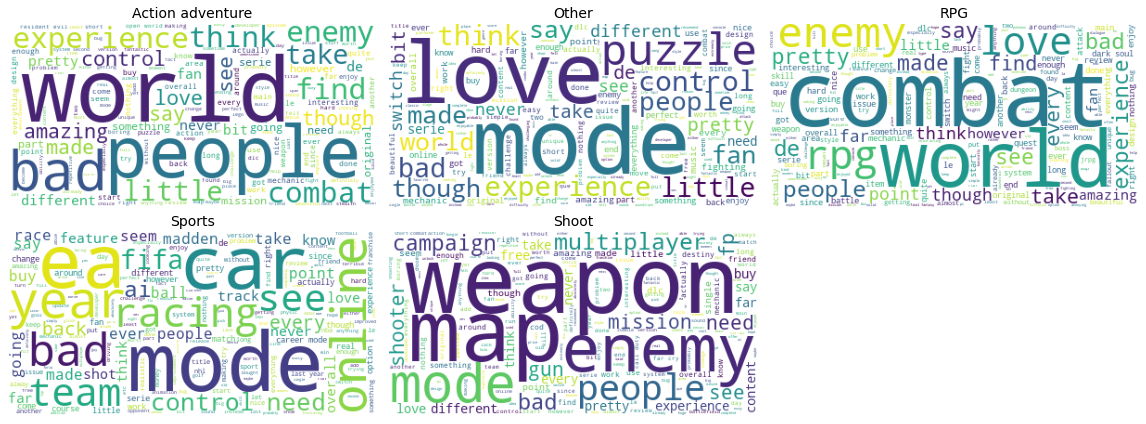

<Figure size 1008x720 with 0 Axes>

In [95]:
# Initialize wordcloud object
wc = WordCloud(stopwords=stop_words, background_color='white', random_state=1)

# Seperate documents by genre
genreReviews = {}
for g in pd.unique(gameReviews.genre):
    genreReviews[g] = ' '.join(gameReviews[gameReviews.genre == g].clean_text)


# Loop over genre and reviews to create word clouds for each
plt.rcParams['figure.figsize'] = [16, 6]
idx = 1
for genre, reviews in genreReviews.items():
    wc.generate(reviews)        
    plt.subplot(2,3,idx)
    plt.imshow(wc) 
    plt.axis("off") 
    plt.tight_layout(pad = 1)
    plt.title(genre, fontsize=14)

    idx += 1

#plt.figure(figsize=(14,10))
plt.show()

In [96]:
gameReviews.to_csv('MetacriticGameReviewsClean.csv')